In [485]:
import numpy as np 
import pandas as pd 
from datetime import datetime

In [486]:
df = pd.read_csv("waypoints240820221627-robot-dlo-odom_node-odom.csv")
df.head()

,time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,.child_frame_id,.pose.pose.position.x,.pose.pose.position.y,.pose.pose.position.z,.pose.pose.orientation.x,...,.pose.pose.orientation.z,.pose.pose.orientation.w,.pose.covariance,.twist.twist.linear.x,.twist.twist.linear.y,.twist.twist.linear.z,.twist.twist.angular.x,.twist.twist.angular.y,.twist.twist.angular.z,.twist.covariance
0,2022/08/24/08:28:34.217220,1364,2154,571755330,robot/odom,robot/base_link,0.009307,0.000223,0.003352,-0.000646,...,0.000101,0.999995,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2022/08/24/08:28:34.319766,1365,2154,671791710,robot/odom,robot/base_link,0.006279,0.000308,0.000614,-0.000379,...,0.000097,0.999995,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2022/08/24/08:28:34.424807,1366,2154,771786490,robot/odom,robot/base_link,0.010038,0.000994,0.000401,-0.000380,...,0.000056,0.999994,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2022/08/24/08:28:34.527594,1367,2154,871777700,robot/odom,robot/base_link,0.010477,0.000205,0.000878,-0.000353,...,0.000135,0.999996,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2022/08/24/08:28:34.628930,1368,2154,971742640,robot/odom,robot/base_link,0.009086,0.000975,0.001173,-0.000224,...,0.000133,0.999994,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [487]:
df.columns.values

array(['time', '.header.seq', '.header.stamp.secs', '.header.stamp.nsecs',
       '.header.frame_id', '.child_frame_id', '.pose.pose.position.x',
       '.pose.pose.position.y', '.pose.pose.position.z',
       '.pose.pose.orientation.x', '.pose.pose.orientation.y',
       '.pose.pose.orientation.z', '.pose.pose.orientation.w',
       '.pose.covariance', '.twist.twist.linear.x',
       '.twist.twist.linear.y', '.twist.twist.linear.z',
       '.twist.twist.angular.x', '.twist.twist.angular.y',
       '.twist.twist.angular.z', '.twist.covariance'], dtype=object)

In [488]:
df.rename(columns = {'.pose.pose.position.x':'PosX', '.pose.pose.position.y':'PosY' ,'.pose.pose.position.z':'PosZ' ,\
     '.pose.pose.orientation.x':'OrX','.pose.pose.orientation.y':'OrY','.pose.pose.orientation.z':'OrZ','.pose.pose.orientation.w':'OrW'}, inplace = True)
df.head()

,time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,.child_frame_id,PosX,PosY,PosZ,OrX,...,OrZ,OrW,.pose.covariance,.twist.twist.linear.x,.twist.twist.linear.y,.twist.twist.linear.z,.twist.twist.angular.x,.twist.twist.angular.y,.twist.twist.angular.z,.twist.covariance
0,2022/08/24/08:28:34.217220,1364,2154,571755330,robot/odom,robot/base_link,0.009307,0.000223,0.003352,-0.000646,...,0.000101,0.999995,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2022/08/24/08:28:34.319766,1365,2154,671791710,robot/odom,robot/base_link,0.006279,0.000308,0.000614,-0.000379,...,0.000097,0.999995,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2022/08/24/08:28:34.424807,1366,2154,771786490,robot/odom,robot/base_link,0.010038,0.000994,0.000401,-0.000380,...,0.000056,0.999994,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2022/08/24/08:28:34.527594,1367,2154,871777700,robot/odom,robot/base_link,0.010477,0.000205,0.000878,-0.000353,...,0.000135,0.999996,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2022/08/24/08:28:34.628930,1368,2154,971742640,robot/odom,robot/base_link,0.009086,0.000975,0.001173,-0.000224,...,0.000133,0.999994,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [489]:
df.columns.values

array(['time', '.header.seq', '.header.stamp.secs', '.header.stamp.nsecs',
       '.header.frame_id', '.child_frame_id', 'PosX', 'PosY', 'PosZ',
       'OrX', 'OrY', 'OrZ', 'OrW', '.pose.covariance',
       '.twist.twist.linear.x', '.twist.twist.linear.y',
       '.twist.twist.linear.z', '.twist.twist.angular.x',
       '.twist.twist.angular.y', '.twist.twist.angular.z',
       '.twist.covariance'], dtype=object)

In [490]:
df.drop(['.header.seq', '.header.stamp.secs', '.header.stamp.nsecs','.header.frame_id' ,\
    '.child_frame_id', '.pose.covariance', '.twist.twist.linear.x',\
       '.twist.twist.linear.y', '.twist.twist.linear.z',\
       '.twist.twist.angular.x', '.twist.twist.angular.y',\
       '.twist.twist.angular.z', '.twist.covariance','OrX', 'OrY', 'OrZ', 'OrW','PosZ'], inplace=True, axis=1)
df.head()

,time,PosX,PosY
0,2022/08/24/08:28:34.217220,0.009307,0.000223
1,2022/08/24/08:28:34.319766,0.006279,0.000308
2,2022/08/24/08:28:34.424807,0.010038,0.000994
3,2022/08/24/08:28:34.527594,0.010477,0.000205
4,2022/08/24/08:28:34.628930,0.009086,0.000975


In [491]:
df['time']= df['time'].apply(lambda x: datetime.strptime(x.strip(), '%Y/%m/%d/%H:%M:%S.%f'))
df['time']

0      2022-08-24 08:28:34.217220
1      2022-08-24 08:28:34.319766
2      2022-08-24 08:28:34.424807
3      2022-08-24 08:28:34.527594
4      2022-08-24 08:28:34.628930
                  ...            
1006   2022-08-24 08:30:14.821933
1007   2022-08-24 08:30:14.908629
1008   2022-08-24 08:30:15.009254
1009   2022-08-24 08:30:15.108640
1010   2022-08-24 08:30:15.209861
Name: time, Length: 1011, dtype: datetime64[ns]

In [492]:
df.head(5)

,time,PosX,PosY
0,2022-08-24 08:28:34.217220,0.009307,0.000223
1,2022-08-24 08:28:34.319766,0.006279,0.000308
2,2022-08-24 08:28:34.424807,0.010038,0.000994
3,2022-08-24 08:28:34.527594,0.010477,0.000205
4,2022-08-24 08:28:34.628930,0.009086,0.000975


In [493]:
import math 
import matplotlib.pyplot as plt
import datetime 

In [494]:
lastPx = 0 
lastPy = 0 
lastT = 0 
vMag = []
timeStamp = []
t = []
for idx , (currentT , currentPx, currentPy) in enumerate (zip(df.time ,df.PosX, df.PosY)):
    #if idx !=0:  
    currentT = currentT.timestamp() #- df.time[0].timestamp()
    # else:
        # currentT = 0 
    timeStamp.append((currentT)) # in mins
    t.append(currentT-timeStamp[0])
    dt = currentT-lastT
    # print(dt) 
    dx = currentPx - lastPx
    # print(dx)
    dy = currentPy - lastPy
    # print(dy)
    # try:
    currentVx = float(dx)/float(dt)
    # except:
        # print("division by Zero , 2lak ma henta ")
    currentVy = float(dy/dt) 
    
    vMag.append(math.sqrt(currentVx**2 + currentVy**2))
    lastT , lastPx  , lastPy  = currentT , currentPx  , currentPy 

df['Vmag'] = vMag
df['t'] = t
# print(t)

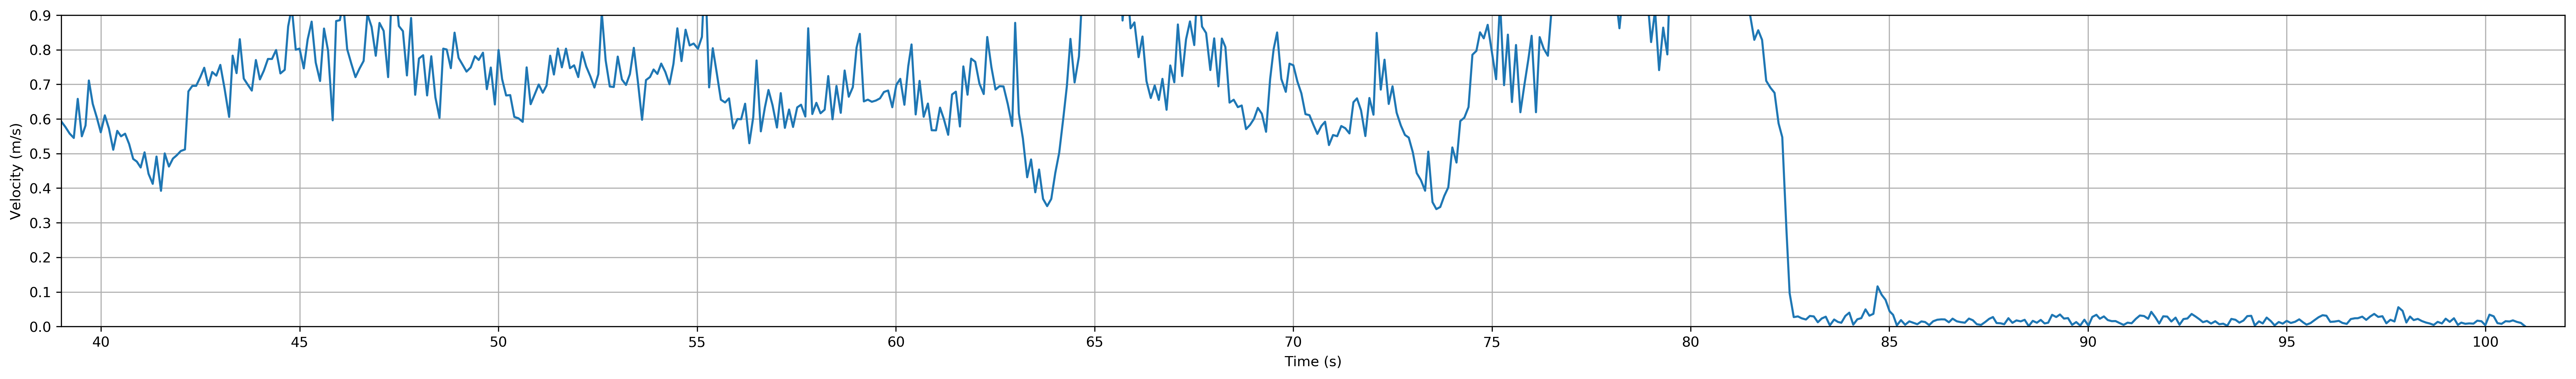

In [495]:
plt.figure(dpi=300, figsize=(32,4))
plt.grid()
plt.xlim(39,102)
plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(t, vMag)

In [496]:
df=df.loc[(df['t'] >= 5.0) & (df['t'] <= 85.0)]
df.head()
# df_new = df.iloc[df.t >= 5 and df.t <=85.0] 

,time,PosX,PosY,Vmag,t
51,2022-08-24 08:28:39.316024,0.006514,0.001793,0.011097,5.098804
52,2022-08-24 08:28:39.416975,0.005724,-0.000403,0.023117,5.199755
53,2022-08-24 08:28:39.518755,0.008972,0.000942,0.034540,5.301535
54,2022-08-24 08:28:39.625505,0.013252,0.002106,0.041557,5.408285
55,2022-08-24 08:28:39.727289,0.022939,0.000880,0.095932,5.510069


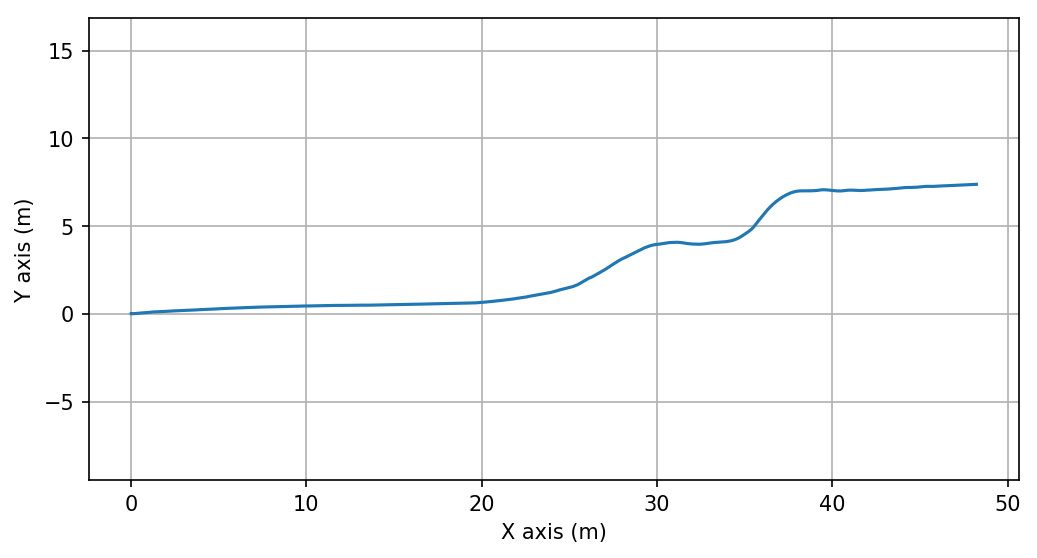

In [497]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(df.PosX , df.PosY)


In [498]:
df.head()

,time,PosX,PosY,Vmag,t
51,2022-08-24 08:28:39.316024,0.006514,0.001793,0.011097,5.098804
52,2022-08-24 08:28:39.416975,0.005724,-0.000403,0.023117,5.199755
53,2022-08-24 08:28:39.518755,0.008972,0.000942,0.034540,5.301535
54,2022-08-24 08:28:39.625505,0.013252,0.002106,0.041557,5.408285
55,2022-08-24 08:28:39.727289,0.022939,0.000880,0.095932,5.510069


In [499]:
carla_df = pd.DataFrame([df.PosX ,df.PosY , df.Vmag, df.t]).transpose()
carla_df.columns=['X','Y','V','Tway']
carla_df.Y = carla_df.Y * -1 
carla_df.head() 

,X,Y,V,Tway
51,0.006514,-0.001793,0.011097,5.098804
52,0.005724,0.000403,0.023117,5.199755
53,0.008972,-0.000942,0.034540,5.301535
54,0.013252,-0.002106,0.041557,5.408285
55,0.022939,-0.000880,0.095932,5.510069


In [500]:
carla_df.to_csv("racetrack_waypoints.txt", header=False,index=False)

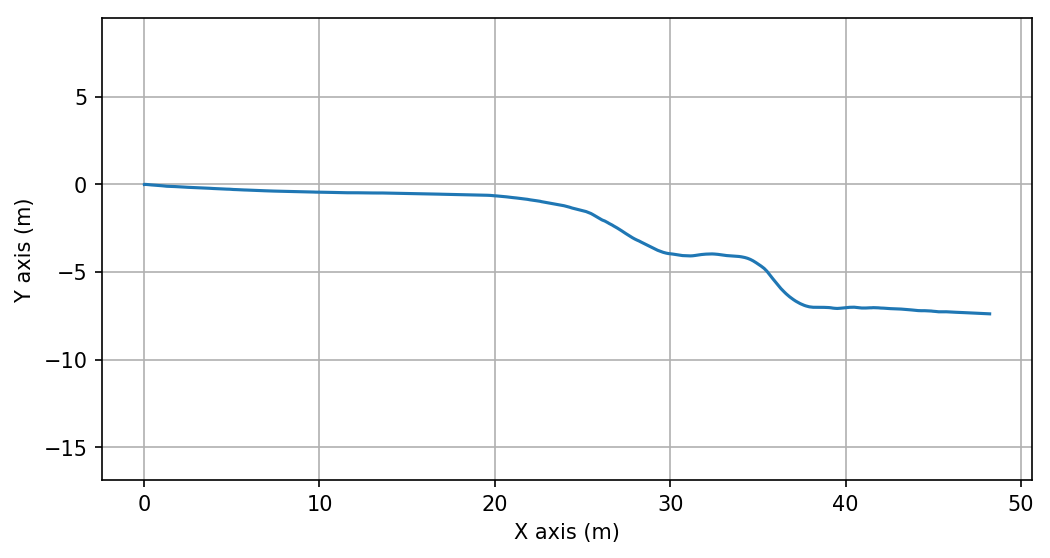

In [501]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(carla_df.X , carla_df.Y)

In [502]:
df.shape

(799, 5)

In [503]:
carla_df.columns.values

array(['X', 'Y', 'V', 'Tway'], dtype=object)

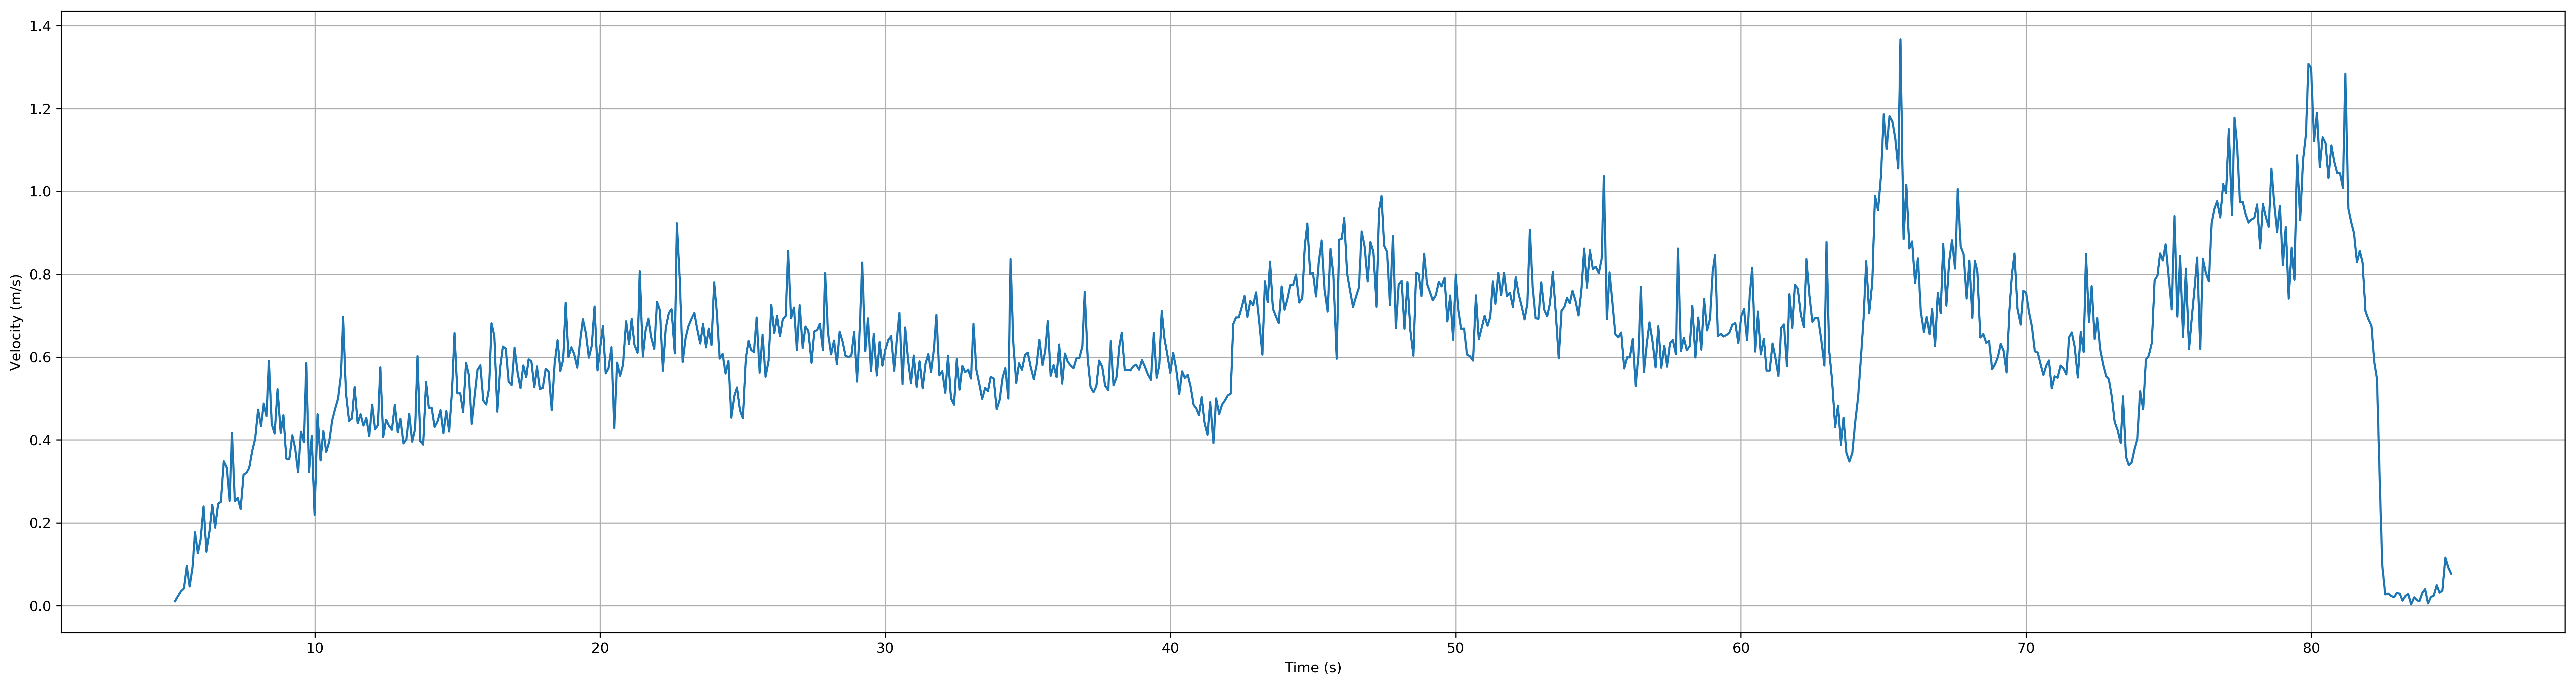

In [504]:
plt.figure(dpi=300, figsize=(32,8))
plt.grid()
# plt.xlim(5,84)
# plt.ylim(0,1.5)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(carla_df.Tway, carla_df.V)

In [505]:
carla_df_avgV = pd.DataFrame([df.PosX ,df.PosY,df.Vmag ]).transpose()
carla_df_avgV.columns=['X','Y','V']
carla_df_avgV.head() 

,X,Y,V
51,0.006514,0.001793,0.011097
52,0.005724,-0.000403,0.023117
53,0.008972,0.000942,0.034540
54,0.013252,0.002106,0.041557
55,0.022939,0.000880,0.095932


In [506]:
carla_df_avgV.V = carla_df.V.mean()
carla_df_avgV.head()

,X,Y,V
51,0.006514,0.001793,0.629583
52,0.005724,-0.000403,0.629583
53,0.008972,0.000942,0.629583
54,0.013252,0.002106,0.629583
55,0.022939,0.000880,0.629583


In [507]:
# sample_df = carla_df_avgV[start:finish]
sample_df = carla_df[1:41]
# print(sample_df)
print(sample_df.shape)
def avg_calc(sample):
  return sample.mean()
  
x,y,v,t = avg_calc(sample= sample_df)
print(x,y,v,t)

(40, 4)
0.4373362766695209 -0.0343386586027918 0.28810671838697 7.151801300048828


In [508]:
print(carla_df.shape)

(799, 4)


In [509]:
carla_df.reset_index(drop=True, inplace=True)

In [510]:
carla_df.head()

,X,Y,V,Tway
0,0.006514,-0.001793,0.011097,5.098804
1,0.005724,0.000403,0.023117,5.199755
2,0.008972,-0.000942,0.034540,5.301535
3,0.013252,-0.002106,0.041557,5.408285
4,0.022939,-0.000880,0.095932,5.510069


#### Build waypoints

In [511]:
start = 0
increment = 5
finish = start + increment 
t_wp = []
x = []
y = []
v = []

x.append(carla_df.X[0])
y.append(carla_df.Y[0])
v.append(carla_df.V[0])
t_wp.append(0.0)
t_wp_0 = carla_df.Tway[0]

# print('    X\t\t      Y\t\t     V\t\t     T')
for i in range((carla_df.shape[0] - start)//increment):
    sample_df = carla_df[start:finish]
    xVal, yVal, vVal, tVal = avg_calc(sample= sample_df)
    x.append(xVal)
    y.append(yVal)
    v.append(vVal)
    t_wp.append(tVal-t_wp_0)
    
    # print(round(xVal,6),'\t',round(yVal,6),'\t',round(vVal,6),'\t',round(tVal-t_wp_0,6))

    start = finish
    finish += increment

# print((t_wp))
waypoints_df = pd.DataFrame()
waypoints_df['X'] = x
waypoints_df['Y'] = y
waypoints_df['V'] = v
waypoints_df['T'] = t_wp
# waypoints_df['V_avg'] = waypoints_df['V'].rolling(15).mean()
# waypoints_df.columns=['T','X','Y','V']
waypoints_df.shape

(160, 4)

In [512]:
# from math import nan

# for i in range(0,14):
#     waypoints_df['V_avg'][i] = waypoints_df['V_avg'][14]/13 * i
# waypoints_df['V_avg']

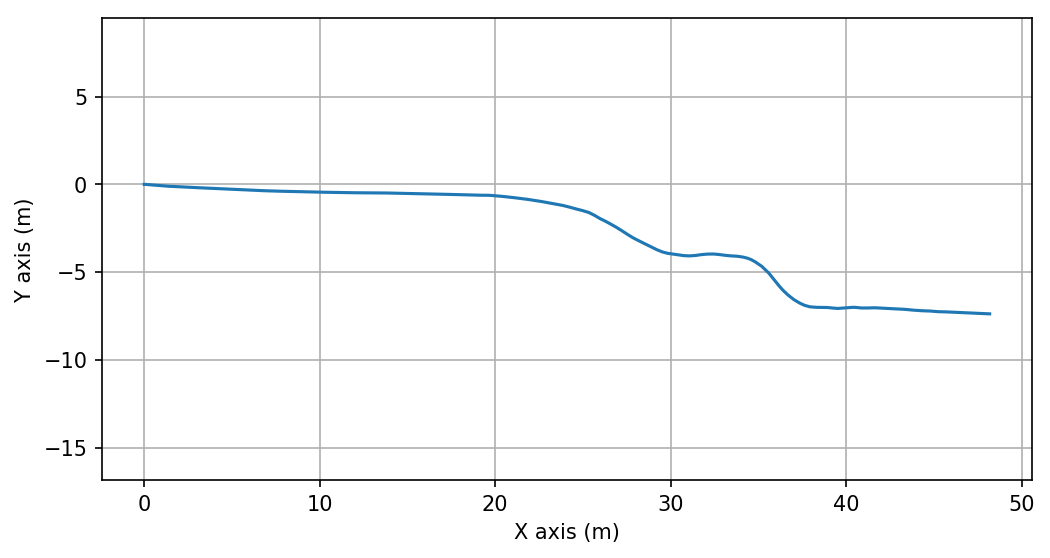

In [513]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(waypoints_df.X , waypoints_df.Y)

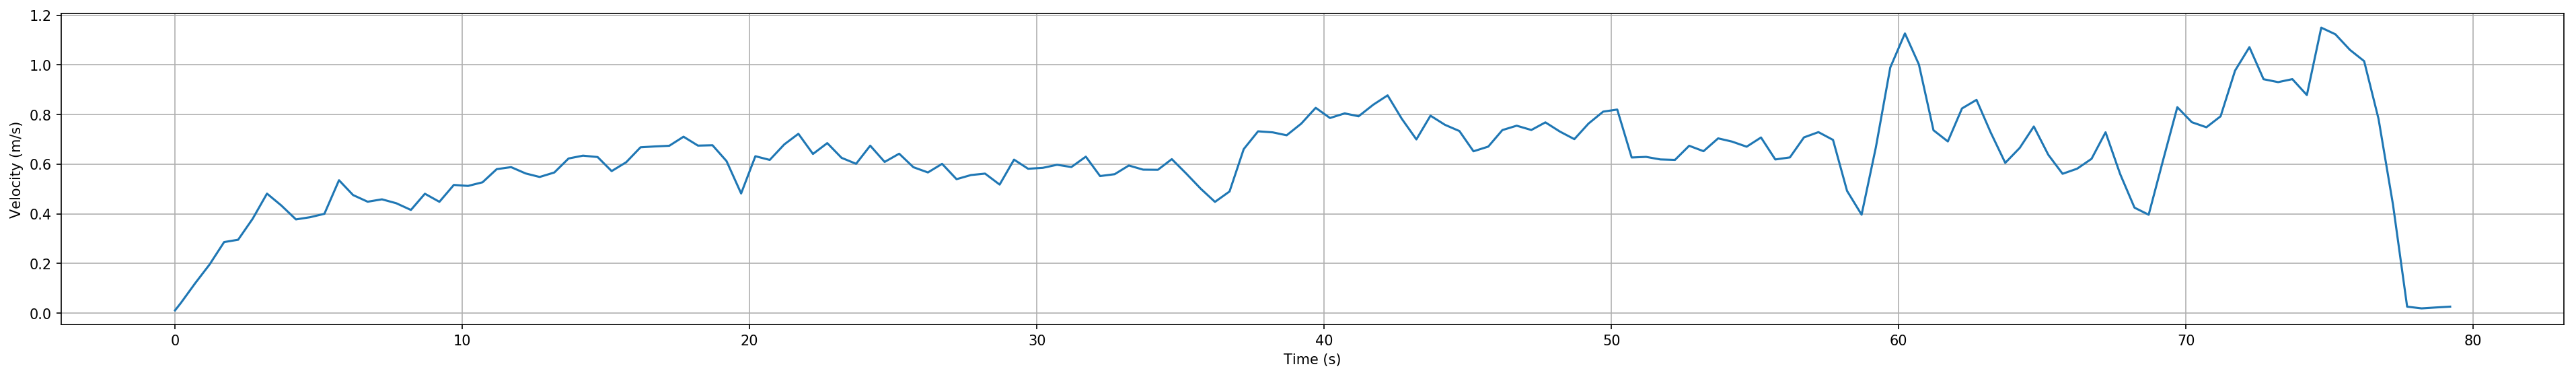

In [514]:
plt.figure(dpi=150, figsize=(32,4))
plt.grid()
# plt.xlim(39,102)
# plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(t_wp, v)

#### This is to check when is the car going to move 

In [515]:
df.index[(df['t'] >= 39.0) & (df['t']<=40.0)]
for i in range(390,400):
    print(df.iloc[i])

time    2022-08-24 08:29:18.315575
PosX                     21.313408
PosY                      0.787878
Vmag                      0.739875
t                        44.098355
Name: 441, dtype: object
time    2022-08-24 08:29:18.417468
PosX                       21.3913
PosY                      0.799909
Vmag                      0.773516
t                        44.200248
Name: 442, dtype: object
time    2022-08-24 08:29:18.519026
PosX                     21.469521
PosY                      0.807206
Vmag                      0.773549
t                        44.301806
Name: 443, dtype: object
time    2022-08-24 08:29:18.622855
PosX                     21.552048
PosY                      0.816034
Vmag                      0.799372
t                        44.405635
Name: 444, dtype: object
time    2022-08-24 08:29:18.731416
PosX                     21.630798
PosY                      0.826437
Vmag                      0.731706
t                        44.514196
Name: 445, dtype: object


In [516]:
waypoints_df.head()

,X,Y,V,T
0,0.006514,-0.001793,0.011097,0.000000
1,0.011480,-0.001064,0.041249,0.204886
2,0.052244,-0.002628,0.120795,0.703793
3,0.139343,-0.010154,0.195896,1.202002
4,0.264053,-0.019186,0.286345,1.709257


In [517]:
# waypoints_df.V = waypoints_df.V.mean()* 1.5
# waypoints_df.head()

In [518]:
# waypoints_df.Y = -1 * waypoints_df.Y

# finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V_avg]).transpose()
finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
finaldf.to_csv("racetrack_waypoints.txt", header=False,index=False)
finaldf.head()

,X,Y,V
0,0.006514,-0.001793,0.011097
1,0.011480,-0.001064,0.041249
2,0.052244,-0.002628,0.120795
3,0.139343,-0.010154,0.195896
4,0.264053,-0.019186,0.286345


In [519]:
finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
finaldf.to_csv("rp.csv", header=False,index=False)
finaldf.head()

,X,Y,V
0,0.006514,-0.001793,0.011097
1,0.011480,-0.001064,0.041249
2,0.052244,-0.002628,0.120795
3,0.139343,-0.010154,0.195896
4,0.264053,-0.019186,0.286345


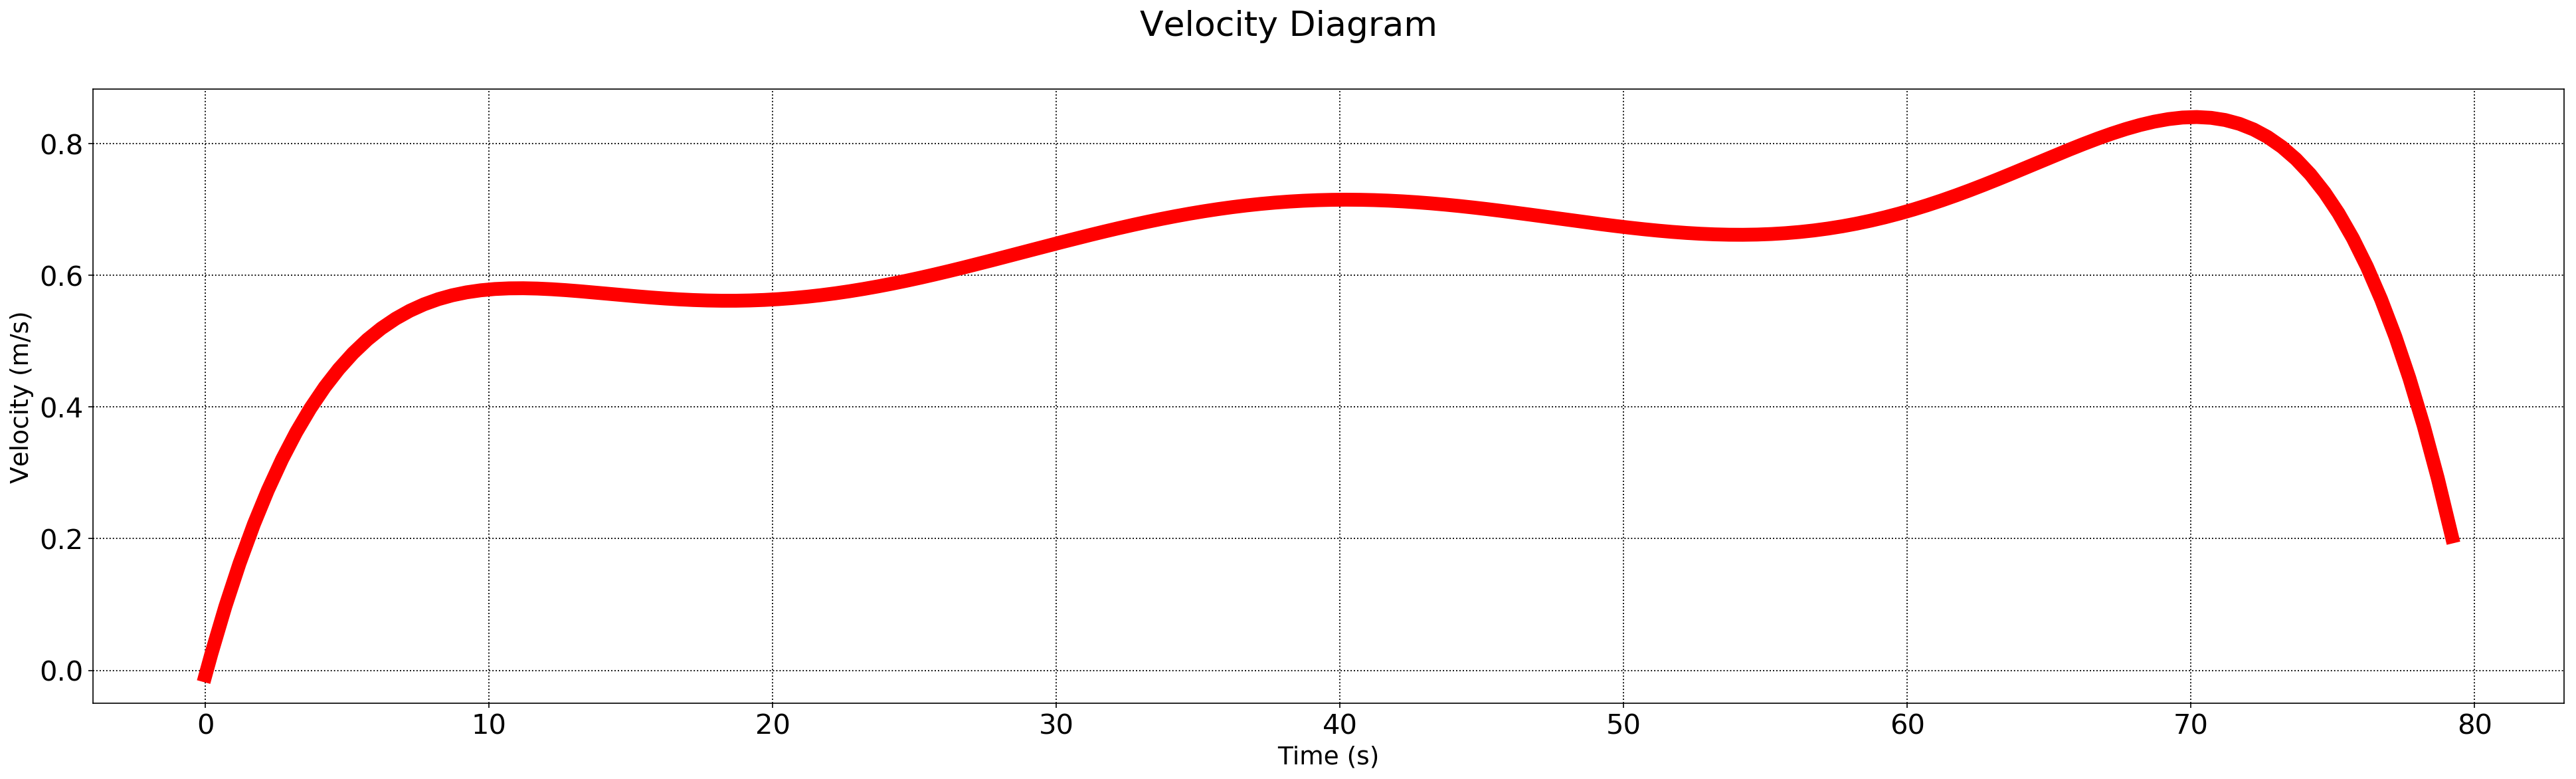

In [520]:
from turtle import color


polyV = waypoints_df.V.to_numpy()
# print(polyV)
V_polyfit = []
V_fcn = np.poly1d(np.polyfit(t_wp , polyV,6))
for i in t_wp:
    V_polyfit.append(V_fcn(i))
# print(V_fcn(t_wp[0]))
# print(V_polyfit)

plt.figure(dpi=150, figsize=(32,8))
plt.suptitle('Velocity Diagram', fontsize=25)
plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
# plt.xlim(0,65)
# plt.ylim(0,0.6)
plt.tick_params(axis='both', labelsize=20)

plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Velocity (m/s)',fontsize=18)

# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(t_wp, V_polyfit, color ='r',linewidth=10)

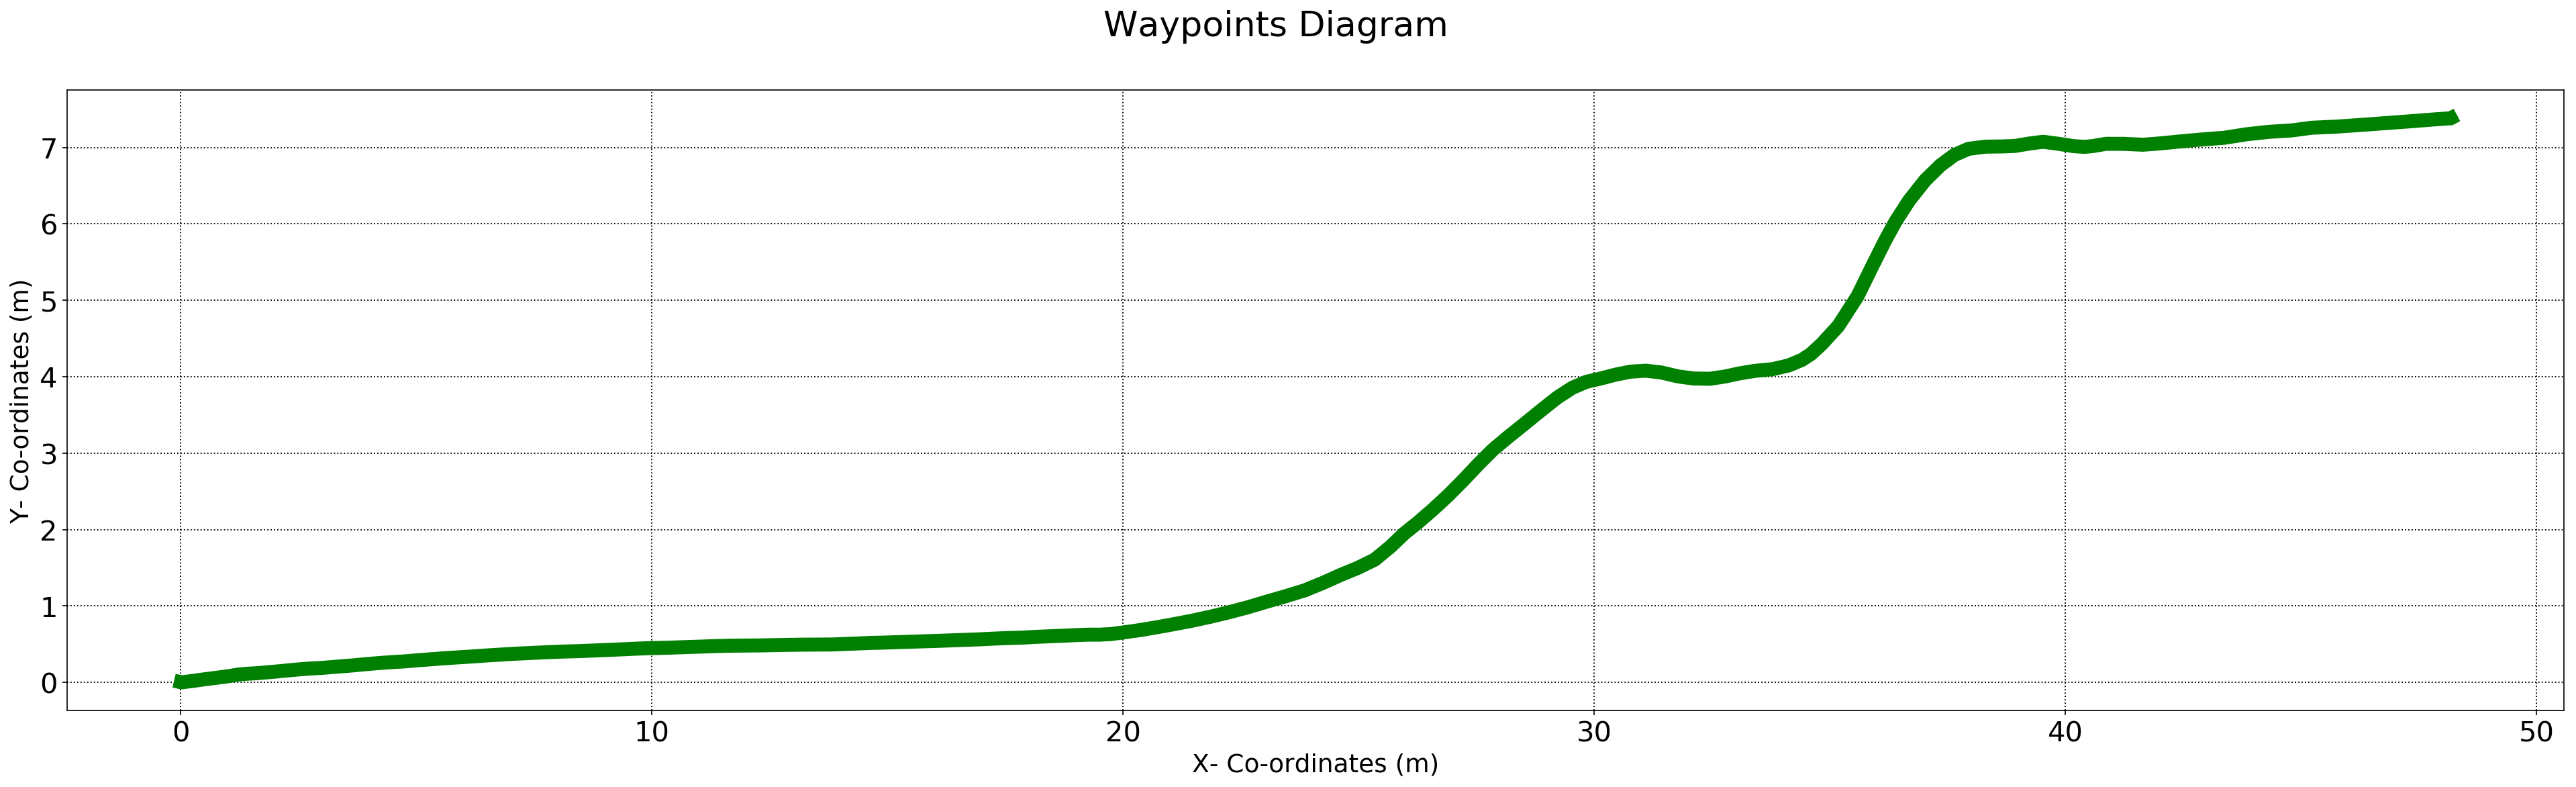

In [521]:
plt.figure(dpi=150, figsize=(32,8))
plt.suptitle('Waypoints Diagram', fontsize=25)
plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
plt.tick_params(axis='both', labelsize=20)
plt.xlabel('X- Co-ordinates (m)',fontsize=18)
plt.ylabel('Y- Co-ordinates (m)',fontsize=18)
plt.plot(finaldf.X , finaldf.Y *-1 , color= 'g', linewidth=10)

In [522]:
waypoints_df.shape

(160, 4)

In [523]:
waypoints_df.V =  V_polyfit
waypoints_df.V *= 1.0
finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
finaldf.to_csv("racetrack_waypoints.txt", header=False,index=False)
finaldf.head()

,X,Y,V
0,0.006514,-0.001793,-0.007642
1,0.011480,-0.001064,0.024421
2,0.052244,-0.002628,0.097064
3,0.139343,-0.010154,0.162353
4,0.264053,-0.019186,0.221915


In [524]:
df2 = pd.read_csv("C:/Users/Admin/Downloads/uuTN7y7rEemnrA4AsaAhFA_bbb340f02eeb11e9a59e73356fd63643_CarlaUE4Windows/CarlaSimulator/PythonClient/Course1FinalProject/racetrack_waypoints_or.csv")
df2.head()
df2.columns=['X_Carla','Y_Carla','V_Carla']
df2['X_Carla'] = df2['X_Carla'] - df2['X_Carla'][0]
df2['Y_Carla'] = df2['Y_Carla'] - df2['Y_Carla'][0]
plt.figure(dpi=100, figsize=(8,4))
plt.grid()
plt.axis('equal')   
plt.plot(-df2.Y_Carla[0:30] ,df2.X_Carla[0:30], waypoints_df.X , waypoints_df.Y)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Admin/Downloads/uuTN7y7rEemnrA4AsaAhFA_bbb340f02eeb11e9a59e73356fd63643_CarlaUE4Windows/CarlaSimulator/PythonClient/Course1FinalProject/racetrack_waypoints_or.csv'